In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
import pandas as pd
import os
import seaborn as sns

In [19]:
d = pd.read_csv('heart.csv')
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
d.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
d.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [22]:
col_val=[]
col_num=[]

for column in d.columns:
    if d[column].nunique()<=20:
       col_val.append(column)
    else:
       col_num.append(column)

In [23]:
col_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [24]:
col_num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [25]:
d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


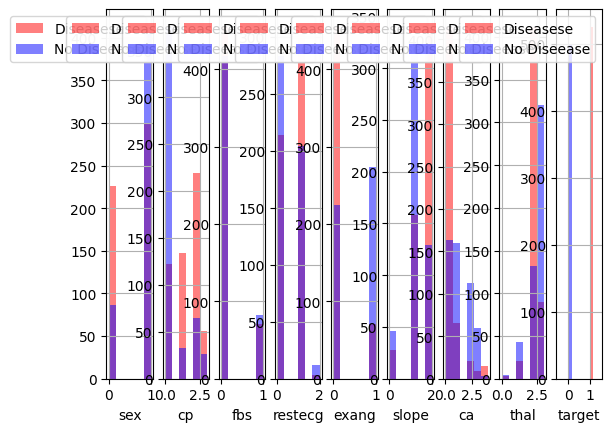

In [26]:
for i, col in enumerate(col_val, 1):
  plt.subplot(1,9,i)
  d[d.target == 1][col].hist(bins=6, color='red', alpha=0.5, label='Diseasese')
  d[d.target == 0][col].hist(bins=6, color='blue', alpha=0.5, label='No Diseease')
  plt.xlabel(col)
  plt.legend()

In [27]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

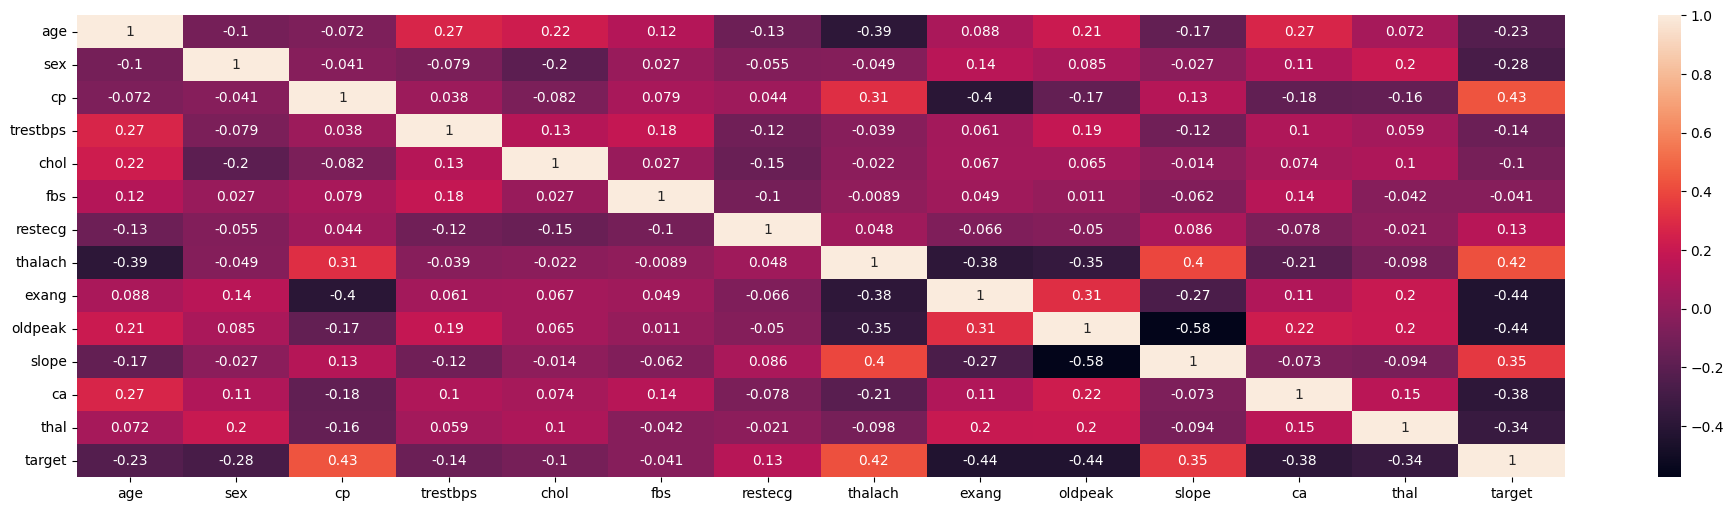

In [28]:
plt.figure(figsize=(24,6))
sns.heatmap(d.corr(),annot=True)

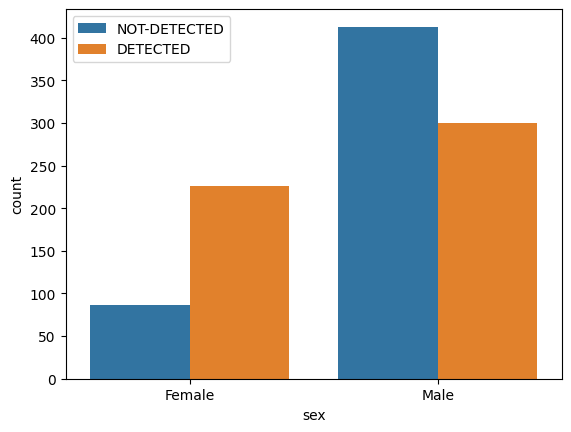

In [29]:
sns.countplot(x='sex',hue="target",data=d)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['NOT-DETECTED','DETECTED'])
plt.show()
sns.set_theme(style='darkgrid')

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [31]:
std = StandardScaler()
d[col_num]= std.fit_transform(d[col_num])
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [32]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [33]:
X1 = d.drop('target', axis=1)
y = d ['target']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X1__train, X1__test, y__train, y__test=train_test_split(X1,y,test_size=0.1,random_state=42)

In [36]:
y__test

,target
527,1
359,1
447,0
31,1
621,0
...,...
294,0
921,0
464,1
107,0


In [37]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_reg = LogisticRegression()

In [40]:
log_reg.fit(X1__train, y__train)

LogisticRegression()

In [41]:
X_Trainpredict=log_reg.predict(X1__train)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
Train_DataAccuracy= accuracy_score(X_Trainpredict,y__train)

In [44]:
print('The accuracy of the training data = ',Train_DataAccuracy)

The accuracy of the training data =  0.8568329718004338


In [45]:
y_pred_log_reg = log_reg.predict(X1__test)

In [46]:
Test_Data_Accuracy= accuracy_score(y__test,y_pred_log_reg)

In [47]:
print('The accuracy on the data of testing model = ', Test_Data_Accuracy)

The accuracy on the data of testing model =  0.8058252427184466


In [48]:
input_d= (45,0,120,200,0,0,182,0,1,4,2,0,2)
input_d_as_numpy_array=np.asarray(input_d)
input_d_reshaped= input_d_as_numpy_array.reshape(1,-1)
d_prediction=log_reg.predict(input_d_reshaped)
print(d_prediction)
if (d_prediction[0]==0):
      print('No Heart Disease has been detected')
else:
    print('Heart Disease has been detected')

[1]
Heart Disease has been detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()
rf.fit(X1__train,y__train)

RandomForestClassifier()

In [51]:
rf.fit(X1__train,y__train)

RandomForestClassifier()

In [52]:
y_pred= rf.predict(X1__test)

In [53]:
accuracy_score(y__test,y_pred)

0.970873786407767

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt = DecisionTreeRegressor()

In [56]:
dt.fit(X1__train,y__train)

DecisionTreeRegressor()

In [57]:
y_pred_dt=dt.predict(X1__test)

In [58]:
accuracy_score(y__test,y_pred_dt)

0.970873786407767

In [59]:
import joblib

In [60]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [61]:
model = joblib.load('model_joblib_heart')

In [62]:
model.predict(input_d_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [63]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *

In [64]:
def show_entry_fields():
  p1=int(e1.get())
  p2=int(e2.get())
  p3=int(e3.get())
  p4=int(e4.get())
  p5=int(e5.get())
  p6=int(e6.get())
  p7=int(e7.get())
  p8=int(e8.get())
  p9=int(e9.get())
  p10=float(e10.get())
  p11=int(e11.get())
  p12=int(e12.get())
  p13=int(e13.get())
  model = joblib.load('model_joblib_heart')
  result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])


  if result == 0:
    Label(master, text="No Heart Disease").grid(row=31)
  else:
    Label(master, text="Possibility of Heart Disease").grid(row=31)
  master = Tk()
  master.title("Heart Disease Prediction System")
  label = Label(master, text = "Heart Disease Prediction System"
  , bg = "black", fg = "white"). \
  grid(row=0,columnspan=2)
  Label(master, text="Enter Your Age").grid(row=1)
  Label(master, text="Male Or Female [1/0]").grid(row=2)
  Label(master, text="Enter Value of CP").grid(row=3)
  Label(master, text="Enter Value of trestbps").grid(row=4)
  Label(master, text="Enter Value of chol").grid(row=5)
  Label(master, text="Enter Value of fbs").grid(row=6)
  Label(master, text="Enter Value of restecg").grid(row=7)
  Label(master, text="Enter Value of thalach").grid(row=8)
  Label(master, text="Enter Value of exang").grid(row=9)
  Label(master, text="Enter Value of oldpeak").grid(row=10)
  Label(master, text="Enter Value of slope").grid(row=11)
  Label(master, text="Enter Value of ca").grid(row=12)
  Label(master, text="Enter Value of thal").grid(row=13)
  e1 = Entry(master)
  e2 = Entry(master)
  e3 = Entry(master)
  e4 = Entry(master)
  e5 = Entry(master)
  e6 = Entry(master)
  e7 = Entry(master)
  e8 = Entry(master)
  e9 = Entry(master)
  e10 = Entry(master)
  e11 = Entry(master)
  e12 = Entry(master)
  e13 = Entry(master)
  e1.grid(row=1, column=1)
  e2.grid(row=2, column=1)
  e3.grid(row=3, column=1)
  e4.grid(row=4, column=1)
  e5.grid(row=5, column=1)
  e6.grid(row=6, column=1)
  e7.grid(row=7, column=1)
  e8.grid(row=8, column=1)
  e9.grid(row=9, column=1)
  e10.grid(row=10, column=1)
  e11.grid(row=11, column=1)
  e12.grid(row=12, column=1)
  e13.grid(row=13, column=1)
  Button(master, text='Predict', command=show_entry_fields).grid()
  mainloop()

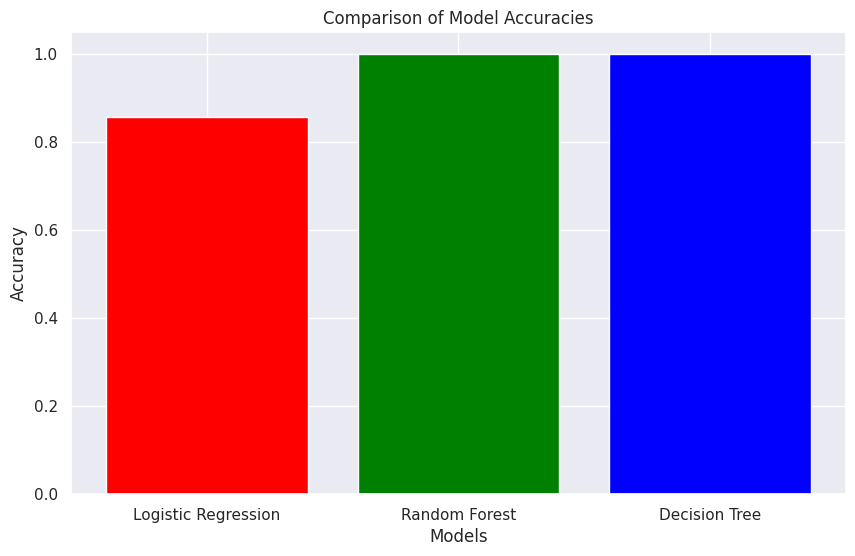

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

# It appears y__test has a different number of samples than y_pred and y_test
# y__test is not used, so it is being removed
accuracy = [Train_DataAccuracy, accuracy_score(y_pred,y_pred), accuracy_score(y_pred,y_pred)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['red', 'green', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

In [66]:
import numpy as np
def get_user_input():
  age = int(input("Enter your age: "))
  sex = int(input("Enter your sex (1 for male, 0 for female): "))
  cp = int(input("Enter your chest pain type (0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, 3 for asymptomatic): "))
  trestbps = int(input("Enter your resting blood pressure (in mm Hg): "))
  chol = int(input("Enter your serum cholesterol in mg/dl: "))
  fbs = int(input("Enter your fasting blood sugar (1 for true, 0 for false): "))
  restecg = int(input("Enter your resting electrocardiographic results (0 for normal, 1 for having ST-T wave abnormality, 2 for showing probable or definite left ventricular hypertrophy by Estes' criteria): "))
  thalach = int(input("Enter your maximum heart rate achieved: "))
  exang = int(input("Enter your exercise induced angina (1 for yes, 0 for no): "))
  oldpeak = float(input("Enter your ST depression induced by exercise relative to rest: "))
  slope = int(input("Enter the slope of the peak exercise ST segment (0 for upsloping, 1 for flat, 2 for downsloping): "))
  ca = int(input("Enter the number of major vessels (0-3) colored by fluoroscopy: "))
  thal = int(input("Enter a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect): "))

  user_input = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
  return user_input

def main():
  model = joblib.load('model_joblib_heart')
  user_input = get_user_input()
  user_input_as_numpy_array = np.asarray(user_input)
  user_input_reshaped = user_input_as_numpy_array.reshape(1, -1)
  prediction = model.predict(user_input_reshaped)

  if prediction[0] == 0:
    print("No Heart Disease detected.")
  else:
    print("Heart Disease detected.")

if __name__ == "__main__":
  main()

Enter your age: 18
Enter your sex (1 for male, 0 for female): 1
Enter your chest pain type (0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, 3 for asymptomatic): 2
Enter your resting blood pressure (in mm Hg): 123
Enter your serum cholesterol in mg/dl: 234
Enter your fasting blood sugar (1 for true, 0 for false): 1
Enter your resting electrocardiographic results (0 for normal, 1 for having ST-T wave abnormality, 2 for showing probable or definite left ventricular hypertrophy by Estes' criteria): 1
Enter your maximum heart rate achieved: 12
Enter your exercise induced angina (1 for yes, 0 for no): 0
Enter your ST depression induced by exercise relative to rest: 1
Enter the slope of the peak exercise ST segment (0 for upsloping, 1 for flat, 2 for downsloping): 2
Enter the number of major vessels (0-3) colored by fluoroscopy: 2
Enter a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect): 7
No Heart Disease detected.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
# prompt logistic regreeion

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
data = pd.read_csv('heart.csv')

# Preprocess the data
data.drop_duplicates(inplace=True)
col_val = []
col_num = []
for column in data.columns:
    if data[column].nunique() <= 20:
        col_val.append(column)
    else:
        col_num.append(column)
std = StandardScaler()
data[col_num] = std.fit_transform(data[col_num])

# Split the data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the model on the testing set is:', accuracy)

# Save the model
joblib.dump(log_reg, 'heart_disease_model.joblib')

# Load the model
model = joblib.load('heart_disease_model.joblib')

# prediction using the loaded model
input_data = (45, 0, 120, 200, 0, 0, 182, 0, 1, 4, 2, 0, 2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)

if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

The accuracy of the model on the testing set is: 0.7741935483870968
The person has heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


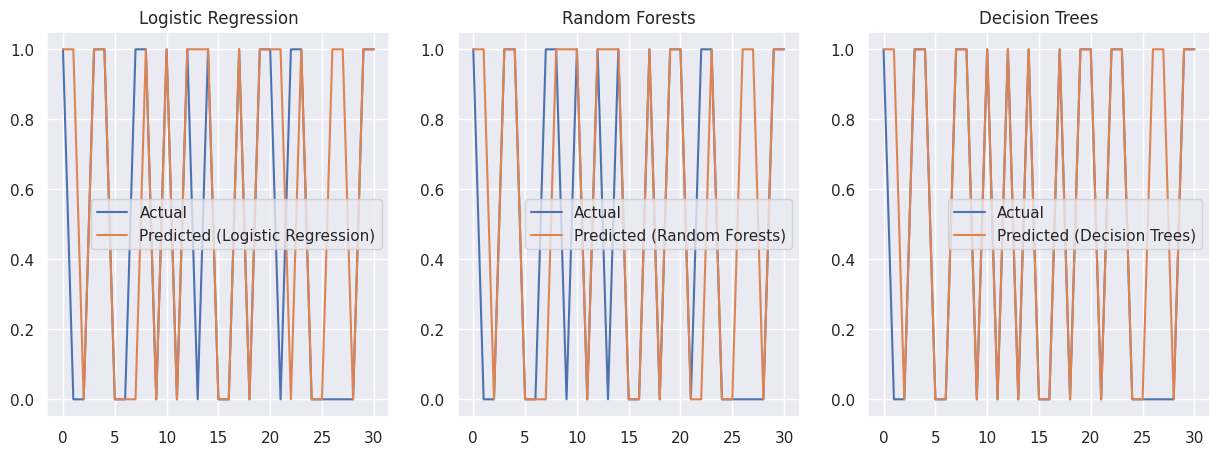

In [68]:
# prompt: make a curve graph to compare predicted and actual values for logistic regression , random forests , and decision trees separately using heart.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('heart.csv')

# Preprocess the data
data.drop_duplicates(inplace=True)
col_val = []
col_num = []
for column in data.columns:
    if data[column].nunique() <= 20:
        col_val.append(column)
    else:
        col_num.append(column)
std = StandardScaler()
data[col_num] = std.fit_transform(data[col_num])

# Split the data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred_log_reg = log_reg.predict(X_test)

# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred_rf = rf.predict(X_test)

# Train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred_dt = dt.predict(X_test)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the predicted and actual values for Logistic Regression
axes[0].plot(range(len(y_test)), y_test, label='Actual')
axes[0].plot(range(len(y_test)), y_pred_log_reg, label='Predicted (Logistic Regression)')
axes[0].set_title('Logistic Regression')
axes[0].legend()

# Plot the predicted and actual values for Random Forests
axes[1].plot(range(len(y_test)), y_test, label='Actual')
axes[1].plot(range(len(y_test)), y_pred_rf, label='Predicted (Random Forests)')
axes[1].set_title('Random Forests')
axes[1].legend()

# Plot the predicted and actual values for Decision Trees
axes[2].plot(range(len(y_test)), y_test, label='Actual')
axes[2].plot(range(len(y_test)), y_pred_dt, label='Predicted (Decision Trees)')
axes[2].set_title('Decision Trees')
axes[2].legend()

# Show the plot
plt.show()